In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numba
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [4]:
df=pd.read_csv('ps.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


<AxesSubplot:>

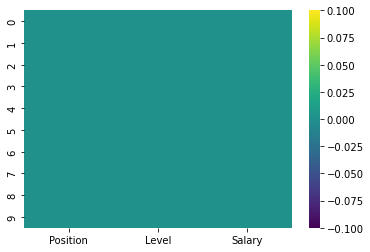

In [7]:
sns.heatmap(df.isnull(),yticklabels=True,cmap='viridis')

# separting X and Y

In [8]:
X=df.iloc[:,1:2]
X.head()

,Level
0,1
1,2
2,3
3,4
4,5


In [10]:
Y=df.iloc[:,2:]
Y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


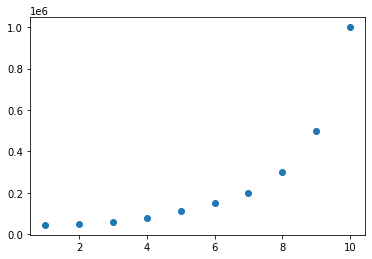

In [11]:
plt.scatter(X,Y)

In [13]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Linear Regression

In [14]:
LR=LinearRegression()
LR.fit(X_train,Y_train)
y_pred=LR.predict(X_test)
score=r2_score(Y_test,y_pred)
score

0.8451346684575975

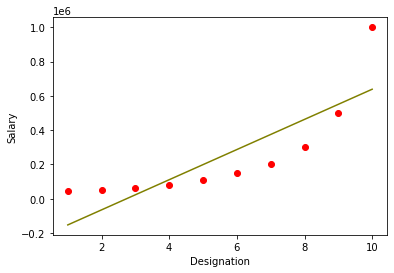

In [16]:
plt.scatter(X,Y,c='red')
plt.plot(X,LR.predict(X),c='olive')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.show()

In [ ]:
## when the data is not in linear format we say that linear regression fails 

In [17]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
## this gives error hence we approach for polynomial regerssion, this contains error in prediction

In [20]:
level=float(input())
LR.predict([[level]])

7


array([[374956.89655172]])

# polynomial regression

# Degree=2

In [21]:
df=pd.read_csv('ps.csv')
X=df.iloc[:,1:2]
Y=df.iloc[:,2:]

In [24]:
PF=PolynomialFeatures(degree=2)
X=PF.fit_transform(X)

In [28]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [30]:
PR2=LinearRegression()
PR2.fit(X_train,Y_train)
y_pred=PR2.predict(X_test)
score=r2_score(Y_test,y_pred)
score

0.7896604512664294

# Degree=5

In [44]:
df=pd.read_csv('ps.csv')
X=df.iloc[:,1:2]
Y=df.iloc[:,2:]

In [45]:
PF=PolynomialFeatures(degree=5)
X=PF.fit_transform(X)

In [46]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [47]:
PR5=LinearRegression()
PR5.fit(X_train,Y_train)
y_pred=PR5.predict(X_test)
score=r2_score(Y_test,y_pred)
score

0.9949078503291597

# Scatter Plot

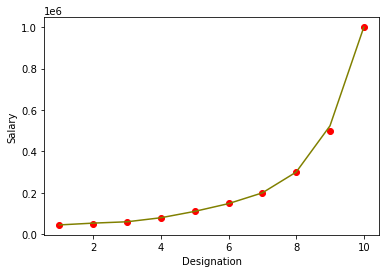

In [51]:
X=df.iloc[:,1:2]
plt.scatter(X,Y,c='red')
plt.plot(X,PR5.predict(PF.fit_transform(X)),c='olive')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.show()

In [48]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [53]:
level=float(input())
PR5.predict(PF.fit_transform([[level]]))

5


array([[110329.5504359]])